In [1]:
import matplotlib.pyplot as plt

def display(matrix, title=None, figsize=(8, 8)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(matrix, cmap="Paired", vmin=0, vmax=12)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(j, i, matrix[i, j], ha="center", va="center", color="w")
    ax.set_title(title)
    #ax.set_axis_off()
    plt.show()

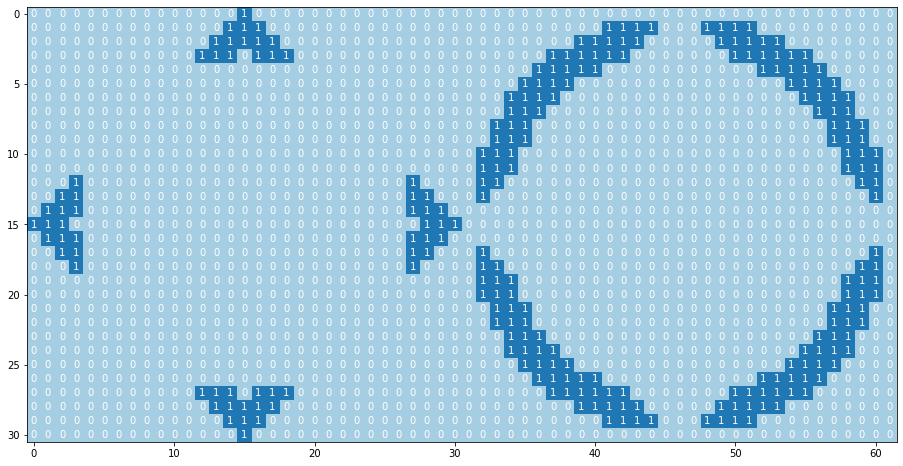

In [2]:
import cv2 as cv
import numpy as np
from skimage.morphology import diamond, disk
from skimage.measure import label, regionprops, regionprops_table
from morphology import binary_closing, binary_opening, binary_dilate, binary_erode

r = 15
a = disk(r)
b = diamond(r)

kernel = disk(3)
a = a - binary_erode(a, kernel)

c = cv.bitwise_and(a, b)
d = cv.bitwise_xor(a, c)
display(np.concatenate((c, d), axis=1), figsize=(16, 8))

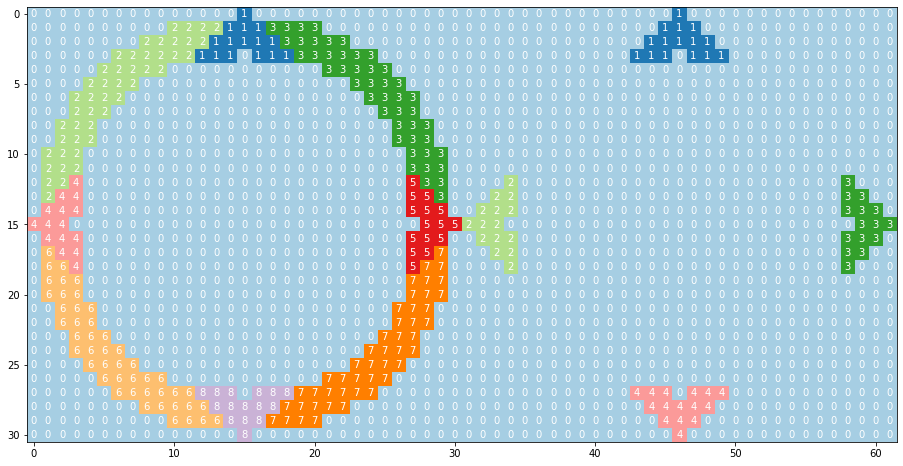

In [3]:
e, f = label(a + c), cv.connectedComponents(c)[1]
display(np.concatenate((e, f), axis=1), figsize=(16, 8))

In [4]:
%timeit label(a + c)
%timeit label(c + d * 2)
%timeit cv.connectedComponents(c)
%timeit cv.connectedComponents(d)
%timeit cv.connectedComponents(c + d * 2)

24.5 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
25.7 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
15.7 µs ± 524 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
16.6 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
23.6 µs ± 621 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops

In [5]:
%timeit props = regionprops(label(c))
%timeit retval, labels = cv.connectedComponents(c, connectivity=8, ltype=cv.CV_16U)
%timeit retval, labels, stats, centroids = cv.connectedComponentsWithStats(c, connectivity=4, ltype=None)
%timeit retval, labels, stats, centroids = cv.connectedComponentsWithStats(c, connectivity=8, ltype=None)
%timeit retval, labels, stats, centroids = cv.connectedComponentsWithStats(c, connectivity=8, ltype=cv.CV_16U)
%timeit retval, labels, stats, centroids = cv.connectedComponentsWithStats(c, connectivity=8, ltype=cv.CV_32S)

53.7 µs ± 751 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
3.32 µs ± 8.93 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
45.5 µs ± 599 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
43.6 µs ± 2.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
8 µs ± 25.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
45.5 µs ± 1.24 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
